In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [5]:
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    conv_3x3 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)
    
    conv_5x5 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)
    
    pool_proj = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)
    
    output = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

In [6]:
input_layer = layers.Input(shape=(28, 28, 1))

In [7]:
x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = inception_module(x, 160, 112, 224, 24, 64, 64)
x = inception_module(x, 128, 128, 256, 24, 64, 64)
x = inception_module(x, 112, 144, 288, 32, 64, 64)
x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = inception_module(x, 256, 160, 320, 32, 128, 128)
x = inception_module(x, 384, 192, 384, 48, 128, 128)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(input_layer, output_layer)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 288s 307ms/step - accuracy: 0.8173 - loss: 0.5091 - val_accuracy: 0.8508 - val_loss: 0.4598
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 254s 270ms/step - accuracy: 0.8679 - loss: 0.3818 - val_accuracy: 0.8786 - val_loss: 0.3605
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 267s 284ms/step - accuracy: 0.8840 - loss: 0.3304 - val_accuracy: 0.8659 - val_loss: 0.3716
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 258s 275ms/step - accuracy: 0.8876 - loss: 0.3148 - val_accuracy: 0.8888 - val_loss: 0.3312
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 251s 267ms/step - accuracy: 0.9010 - loss: 0.2816 - val_accuracy: 0.8814 - val_loss: 0.3416
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 240s 256ms/step - accuracy: 0.9042 - loss: 0.2731 - val_accuracy: 0.8933 - val_loss: 0.3087
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 247s 264ms/step - accuracy: 0.9095 - loss: 0.2538 - val_accuracy: 0.8813 - val_loss: 0.3257
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 241s 257ms/step - accuracy: 0.9135 -

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8997 - loss: 0.3158
Test accuracy: 0.8970


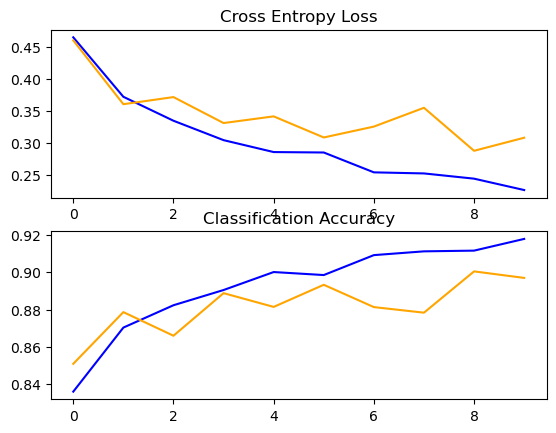

In [16]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [20]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 , 28,1)))
model.add(layers.Dropout(0.2))  # To prevent overfitting
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Build the model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.2))  # To prevent overfitting
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model

NameError: name 'train_images' is not defined

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')